<a href="https://colab.research.google.com/github/brunamycaela/Python/blob/main/puxando%20api%20e%20analisando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# As bibliotecas requests e json vão auxiliar na extração dos dados da API. 
# O pacote pandas vai realizar a estruturação de dados. 
# Por fim, as últimas 3, seaborn, matplotlib e wordcloud vão auxiliar na parte gráfica na análise dos dados.

import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {} # para filtro
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados_parametros = objetos['dados']

In [6]:
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [7]:
# Temos algumas informações importantes, como as colunas do data frame,
# o tipo dos dados, a quantidade total de registro,
# os registros não nulos de cada coluna entre outras informações.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             512 non-null    int64 
 1   uri            512 non-null    object
 2   nome           512 non-null    object
 3   siglaPartido   512 non-null    object
 4   uriPartido     512 non-null    object
 5   siglaUf        512 non-null    object
 6   idLegislatura  512 non-null    int64 
 7   urlFoto        512 non-null    object
 8   email          512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


[]

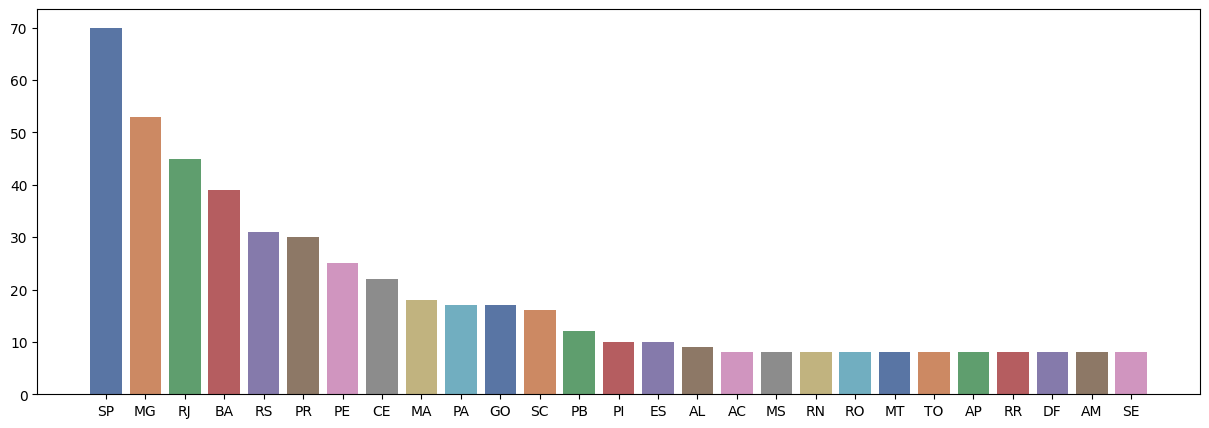

In [8]:
# Análise da quantidade de deputados pela UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

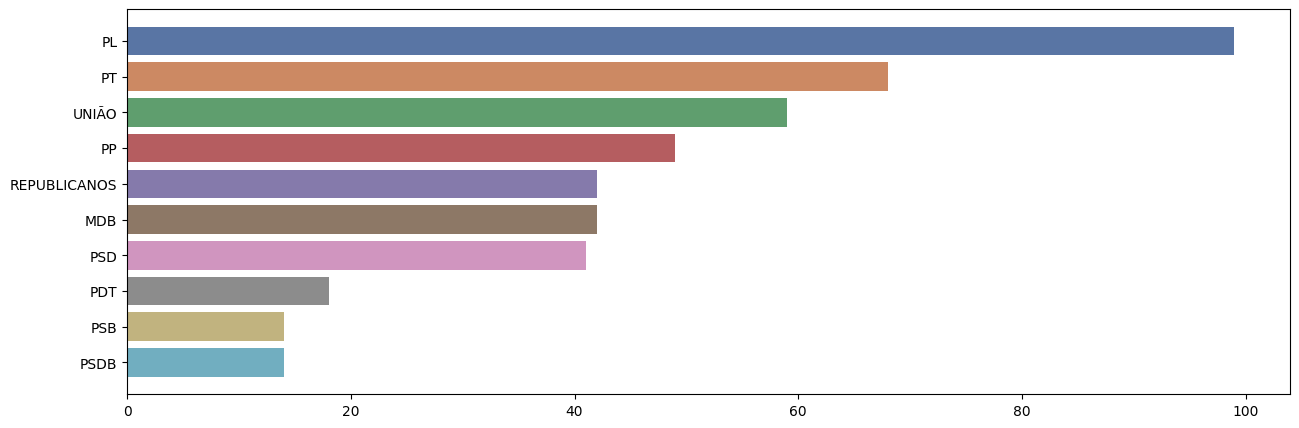

In [9]:
# Análise da quantidade de deputados por Partido
x = df['siglaPartido'].value_counts().head(10).values
y = df['siglaPartido'].value_counts().head(10).index
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

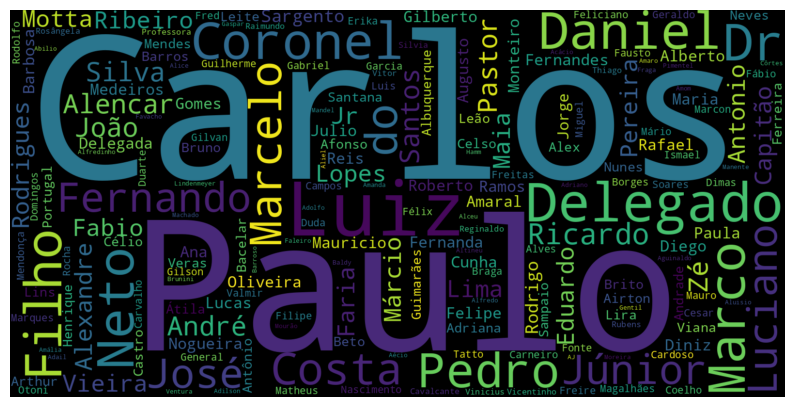

In [10]:
# Análise de nomes de deputados mais comuns
todos_itens = ' '.join(s for s in df['nome'].values)
stop_words = ['de','da']
 
# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, 
               background_color="black",
               width=1600, height=800)
wordcloud = wc.generate(todos_itens)
 
# plotar wordcloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()